# Linear Classification Models

##### Cristobal Donoso
###### Department of Computer Science, University of Concepcion 
October 31, 2018

In classification problem we try to learn a mapping from inputs **x** to outputs **y**, where **y** $\in$ {1,...,C}, with C being the number of classes. A **binary classification** will consider C = 2. In this case y $\in$ {1, 0}. Alternativelly, we could deal with multiples classes. This case is called **multi-label classification**.<br><br>
One way to formalize the problem is as **function approximation**. We assume a unknown function such that **y** = f(**x**). The goal is to **estimate the function f** given a **labeled training set**. Then we wil be able to make prediction using $\hat{y} = \hat{f}(x)$ 

## Logistic Regression
Logistic regression measures the relationship between a dependent variable and one or more independent variables

## Binary Logistic Regression
Binary Logistic regression predicts whether something is **True** or **False**. More formally, we would  like to  estimate the probability $p(C_1|x)$ using a function called the **logistic function** or **logistic sigmoid**.
<center>
$\begin{equation}
f(x) = \frac{exp(a)}{1+exp(a)}
\end{equation}$
</center>
Note that $a = (w_0 + w_1x_1 + \cdots + w_mx_m)$. The variable y takes values y = 0 if f(x) < 0.5 and y=1 if f(x) $\geq$ 0.5<br>
For binary cases, Logistic regression corresponds to the following binary classification model:
<center>
$p(y|x,w) = Ber(y|f(x))$
</center>
<br>
Let's consider an example using [Iris data set](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html):
> Iris data set consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length. 

![alt text](./img/irises.png "Title")

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()

Each row represent a particular sample and each sample have 4 feature: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [2]:
iris.data[0] # let's take the first sample from data 

array([5.1, 3.5, 1.4, 0.2])

As we mencioned before, in supervised learning we need to use labels for each sample. In this case, we have 3 clases.

In [3]:
print('Label for the first sample: {0}. Corresponds to a {1}.'.format(iris.target[0], iris.target_names[0]))

Label for the first sample: 0. Corresponds to a setosa.


For simplicity we only consider 2 feature and 2 labels (Setosa vs Virginica and Versicolar)

In [33]:
x = iris.data[:, :2]
y = (iris.target != 0)*1

In [34]:
print('x shape: {0}'.format(x.shape))
print('Type of classes: {0}'.format(np.unique(y)))

x shape: (150, 2)
Type of classes: [0 1]


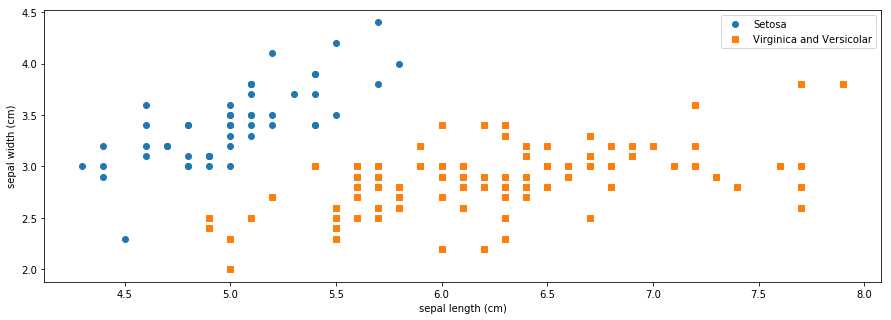

In [35]:
plt.figure(figsize=(15,5))
plt.plot(x[y==0][:,0], x[y==0][:,1], 'o', label='Setosa')
plt.plot(x[y!=0][:,0], x[y!=0][:,1], 's', label='Virginica and Versicolar')
plt.legend()
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

Now, we will define our logistic model from scikit-learn. It will create the model and then it will compute de gradient by using a iterative approach (Newton-Raphson)

In [36]:
from sklearn import linear_model
logistic_regression = linear_model.LogisticRegression(solver='newton-cg')

First we have to split our dataset into train and test subset. Then we will fit and predict using cross-validation over *K-fold* splits

In [43]:

index

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [66]:
from sklearn.model_selection import KFold
from sklearn.utils import shuffle

kf = KFold(n_splits=5)
x,y = shuffle(x,y)
index = np.arange(0, x.shape[0], 1)

mean_acc = []
for train, test in kf.split(index):
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    lr = logistic_regression.fit(x_train, y_train)
    acc = lr.score(x_test, y_test)
    mean_acc.append(acc)
print('mean accuracy: {}'.format(np.mean(mean_acc)))

mean accuracy: 0.986666666667


In [67]:
y_pred = logistic_regression.predict(x_test)

In [68]:
weights = logistic_regression.coef_.flatten()
bias = logistic_regression.intercept_
f = bias + np.dot(x_test, weights.T)

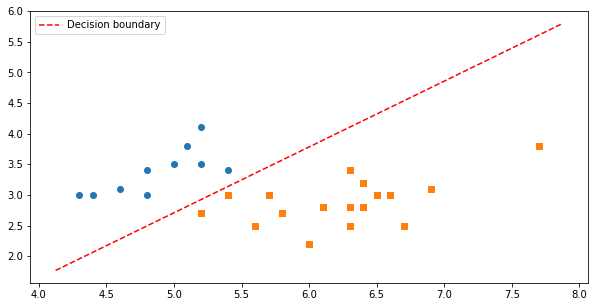

In [72]:
plt.figure(figsize=(10,5))
plt.scatter(x_test[y_pred==0][:,0], x_test[y_pred==0][:,1], marker='o')
plt.scatter(x_test[y_pred!=0][:,0], x_test[y_pred!=0][:,1], marker='s')
ax = plt.gca()
x_vals = np.array(ax.get_xlim())
y_vals = -(x_vals * weights[0] + bias)/weights[1]
plt.plot(x_vals, y_vals, '--', c="red", label='Decision boundary')
plt.legend()
plt.show()

## Nonlinear Decision Boundary

In above formula, we could extend **the linear concept** to multiple dimensions (where we assume the data is linearly separated by an hyperplane). In this way, you can apply non-linear transformations, say $\phi(x)$, in the original **x** space but keeping linear in the feature space. 

## Multiclass logisitic regression

Now we will try to estimate the sample class given all classes in iris dataset. We will consider multinomial logisitic regression (sometimes called a maximum entropy classifier)<br><br>
Let's say: 
<center>
$\begin{equation}
p(y=c|x,W) = \frac{exp(W_c^Tx)}{ \sum_{c'}^C exp(W_{c'}^Tx) } 
\end{equation}$
</center>
where $w_c$ is the c'th column of W. A 

In [85]:
x = iris.data[:,:2]
y = iris.target

In [86]:
print('number of features: {0}\nType of classes: {1}'.format(x.shape, np.unique(y)))

number of features: (150, 2)
Type of classes: [0 1 2]


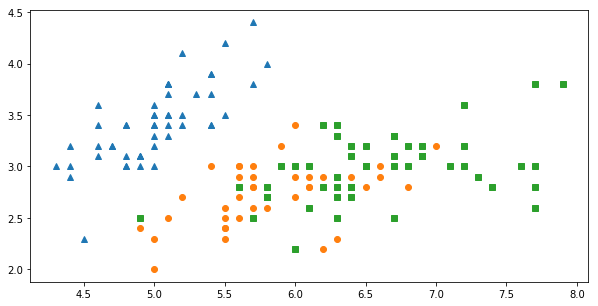

In [87]:
plt.figure(figsize=(10,5))
plt.plot(x[y==0][:,0], x[y==0][:,1], '^')
plt.plot(x[y==1][:,0], x[y==1][:,1], 'o')
plt.plot(x[y==2][:,0], x[y==2][:,1], 's')
plt.show()

In [88]:
lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [90]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [91]:
y_pred = lr.predict(x_test)

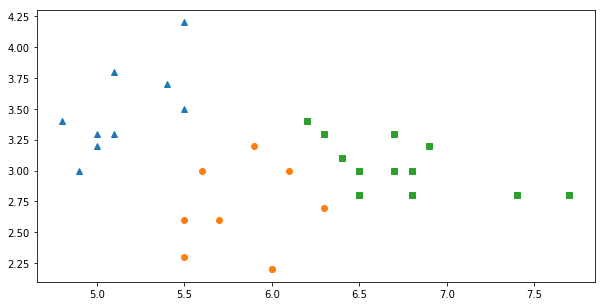

In [92]:
plt.figure(figsize=(10,5))
plt.plot(x_test[y_pred == 0][:,0], x_test[y_pred == 0][:,1], '^')
plt.plot(x_test[y_pred == 1][:,0], x_test[y_pred == 1][:,1], 'o')
plt.plot(x_test[y_pred == 2][:,0], x_test[y_pred == 2][:,1], 's')

In [98]:
means = lr.coef_
print(means)

[[-2.52521875  2.2036556 ]
 [ 0.60793489 -1.40226277]
 [ 1.91728387 -0.80139283]]


## Linear and Quadratic Discriminant Analisys

IN Linear Discriminant Analisys (LDA) we will model the class conditional distribution of the data $p(x|y=k)$ for each class k. Then, prediction can be obtained by using Baye's rule:
<center>
$P(y=k|x) = \frac{P(x | y=k)P(y=k)}{p(x)} = \frac{P(x|y=k)P(y=k)}{\sum_l P(x|y=l)P(y=l)}$
</center>
we can modelate $p(x|y=k)$ as a multivariate Gaussian Distribution<br><br>
<center>
$p(\boldsymbol{x|y=k}) = \mathcal{N}(\boldsymbol{x}|\boldsymbol{\mu}_k, \boldsymbol{\Sigma}) = \frac{1}{(2\pi)^{D/2}}\frac{1}{|\boldsymbol{\Sigma}|^{1/2}}\exp({-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu}_k)^\top\boldsymbol{\Sigma}(\boldsymbol{x}-\boldsymbol{\mu}_k)})$.
</center>
where D is the number of features.

In [128]:
from sklearn.datasets import load_breast_cancer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import KFold, cross_val_score
from time import time

# Load datasets 
data = load_breast_cancer()
x = data.data
y = data.target

In [129]:
x.shape

(569, 30)

In [130]:
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

In [134]:
# Thanks to Guille
def compare(x, y, k_fold = 10):
    t = time()
    sc = cross_val_score(lr, x, y, cv=k_fold)*100
    t = time()-t
    print "LR: score = ", np.mean(sc), " +- ", np.std(sc), ", time = ", t

    t = time()
    sc = cross_val_score(lda, x, y, cv=k_fold)*100
    t = time()-t
    print "LDA: score = ", np.mean(sc), " +- ", np.std(sc), ", time = ", t
    
    t = time()
    sc = cross_val_score(qda, x, y, cv=k_fold)*100
    t = time()-t
    print "QDA: score = ", np.mean(sc), " +- ", np.std(sc), ", time = ", t   

In [135]:
compare(x,y)

LR: score =  95.61025408348458  +-  2.2271676495850556 , time =  1.89760899544
LDA: score =  95.62267738311294  +-  2.6170215513783726 , time =  0.0231249332428
QDA: score =  95.59804684124103  +-  2.12978213952212 , time =  0.0199871063232
